## IMDB Exploratory Data Analysis

In [21]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

In [22]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [23]:
# read in data
imdb_data = pd.read_csv("../../data/imdb.csv")
imdb_data.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [24]:
imdb_data.shape

(979, 6)

In [25]:
imdb_data.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [26]:
# sort movies DF by duration
imdb_data.sort_values(by='duration').head()
imdb_data.sort_values(by='duration').tail()

,star_rating,title,content_rating,genre,duration,actors_list
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


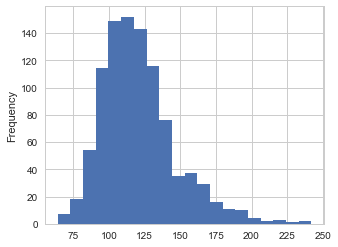

In [29]:
# histogram of duration of movies
imdb_data.duration.plot(kind='hist', bins=20)

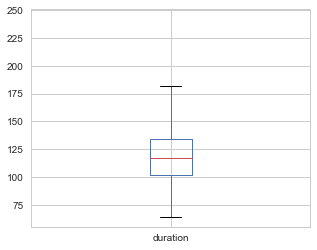

In [31]:
# box plot of duration of movies
imdb_data.duration.plot(kind='box')

In [35]:
imdb_data.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

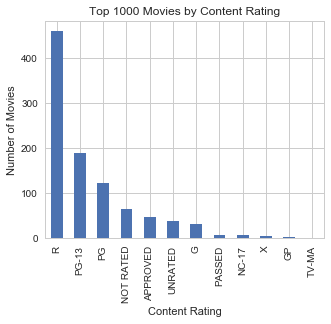

In [37]:
# content ratings bar chart
imdb_data.content_rating.value_counts().plot(kind='bar', title='Top 1000 Movies by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Number of Movies')

In [40]:
# change to unrated
imdb_data.content_rating.replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], 'UNRATED', inplace=True)
imdb_data.content_rating.replace(['X', 'TV-MA'], 'NC-17', inplace=True)

In [41]:
# get number of missing values
imdb_data.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [42]:
# find the 3 missing values in content_rating column
imdb_data[imdb_data.content_rating.isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [43]:
imdb_data.content_rating.fillna('UNRATED', inplace=True)

In [44]:
imdb_data.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

In [46]:
# find the avg star rating of movies >= 120 and < 120
imdb_data[imdb_data.duration >= 120].star_rating.mean()

7.948898678414082

In [47]:
# find the avg star rating of movies >= 120 and < 120
imdb_data[imdb_data.duration < 120].star_rating.mean()

7.838666666666657

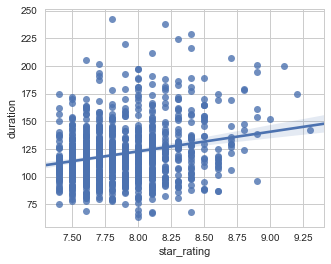

In [50]:
sb.regplot(x='star_rating', y='duration', data=imdb_data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cc0cb50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c9ac6d0>]], dtype=object)

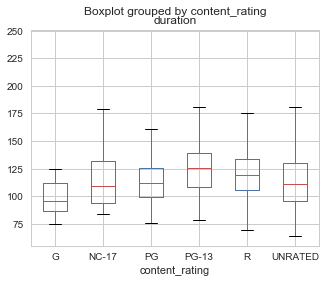

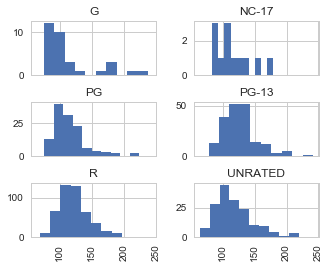

In [52]:
imdb_data.boxplot(column='duration', by='content_rating')
imdb_data.duration.hist(by=imdb_data.content_rating, sharex=True)

In [55]:
# determine top rated movie by star rating for each genre
imdb_data.sort_values(by='star_rating', ascending=False).groupby('genre').title.head()

0                               The Shawshank Redemption
1                                          The Godfather
2                                 The Godfather: Part II
3                                        The Dark Knight
4                                           Pulp Fiction
5                                           12 Angry Men
6                         The Good, the Bad and the Ugly
7          The Lord of the Rings: The Return of the King
8                                       Schindler's List
9                                             Fight Club
13                                          Forrest Gump
14                 The Lord of the Rings: The Two Towers
10     The Lord of the Rings: The Fellowship of the Ring
12        Star Wars: Episode V - The Empire Strikes Back
11                                             Inception
20                                            The Matrix
24                                                 Se7en
23                             

In [59]:
dup_titles = imdb_data[imdb_data.title.duplicated()]

In [60]:
imdb_data[imdb_data.title.isin(dup_titles)]

,star_rating,title,content_rating,genre,duration,actors_list


In [62]:
# calculate star rating for each genre
genre_counts = imdb_data.genre.value_counts()

In [63]:
top_genres = genre_counts[genre_counts > 10].index
top_genres

Index([u'Drama', u'Comedy', u'Action', u'Crime', u'Biography', u'Adventure',
       u'Animation', u'Horror', u'Mystery'],
      dtype='object')

In [67]:
ratings = imdb_data[imdb_data.genre.isin(top_genres)].groupby('genre').star_rating.mean()

In [68]:
ratings.sort_values()

genre
Horror       7.806897
Comedy       7.822436
Biography    7.862338
Action       7.884559
Drama        7.902518
Animation    7.914516
Crime        7.916935
Adventure    7.933333
Mystery      7.975000
Name: star_rating, dtype: float64